In [7]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt


In [8]:
from matplotlib.ticker import FormatStrFormatter

from experiments.util.extract_data import ns2s, median_values, extract_data

HPI_ORANGE = '#DE6207'
HPI_LIGHT_ORANGE = '#F7A900'
HPI_RED = '#B1083A'

In [20]:
def plot_compare_to_device_forward_backward(non_deterministic_data_path, deterministic_data_path, save_to, include_legend=False, y_min_max=None):

    def export_legend(legend, filename="./plots/legend.pdf", expand=[-5,-5,5,5]):
        fig  = legend.figure
        fig.canvas.draw()
        bbox  = legend.get_window_extent()
        bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
        bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(filename, dpi="figure", bbox_inches=bbox)

    matplotlib.rcParams.update({'font.size': 28})
    fig = plt.figure(figsize=(10, 5))
    x_labels = ['to device', 'forward', 'backward']
    non_deterministic = list(map(ns2s, median_values(extract_data(non_deterministic_data_path))))[2:]
    print('non-deterministic medians: {}'.format(non_deterministic))
    deterministic = list(map(ns2s, median_values(extract_data(deterministic_data_path))))[2:]
    print('deterministic medians: {}'.format(deterministic))
    ind = np.arange(len(x_labels))  # the x locations for the groups
    width = 0.4  # the width of the bars
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind + width / 2, non_deterministic, width, color=HPI_LIGHT_ORANGE)
    rects2 = ax.bar(ind + 1.5 * width, deterministic, width, color=HPI_RED)
    ax.set_ylabel('time in seconds')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(x_labels)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.xticks(rotation=25)

    if y_min_max:
        axes = plt.gca()
        axes.set_ylim(y_min_max)
    if include_legend:
        legend = ax.legend((rects1[0], rects2[0]), ('non-deterministic', 'deterministic'),
                           bbox_to_anchor=(1.04, 1), borderaxespad=0)
    fig.savefig(save_to, bbox_inches='tight')


    plt.show()



COMPARE EXECUTION TIMES FOR MOBILENET
non-deterministic medians: [0.002261889, 0.011689238000000001, 0.021085134000000002]
deterministic medians: [0.0022556475, 0.014950329000000002, 0.030422775000000003]


<Figure size 720x360 with 0 Axes>

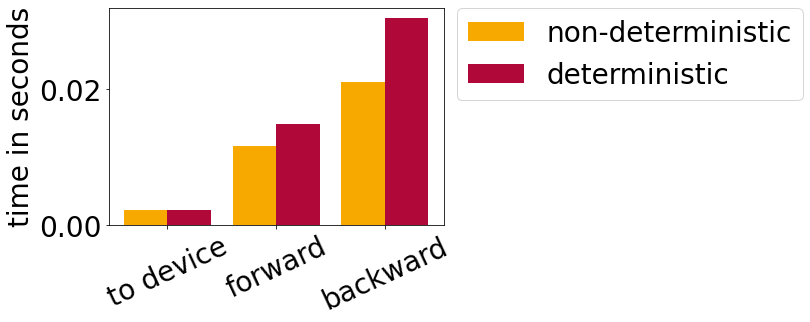

In [10]:
print('COMPARE EXECUTION TIMES FOR MOBILENET')
plot_compare_to_device_forward_backward(
    non_deterministic_data_path='./results/non-deterministic-mobilenet.txt',
    deterministic_data_path='./results/deterministic-mobilenet.txt',
    include_legend=True,
    save_to='./plots/mobilenet.pdf')

COMPARE EXECUTION TIMES FOR GOOGLENET
non-deterministic medians: [0.0022867125, 0.0150125785, 0.025206603]
deterministic medians: [0.0023025325, 0.0241618645, 0.0525532025]


<Figure size 720x360 with 0 Axes>

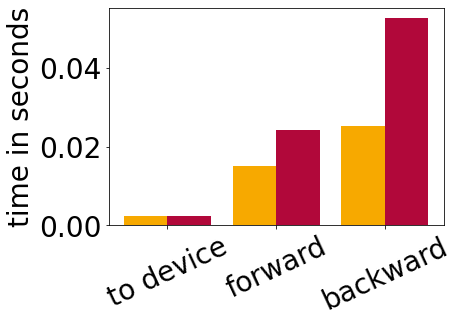

In [11]:
print('COMPARE EXECUTION TIMES FOR GOOGLENET')
plot_compare_to_device_forward_backward(
    non_deterministic_data_path='./results/non-deterministic-googlenet.txt',
    deterministic_data_path='./results/deterministic-googlenet.txt',
    save_to='./plots/googlenet.pdf')

COMPARE EXECUTION TIMES FOR RESNET18
non-deterministic medians: [0.002314855, 0.005984881, 0.0091988335]
deterministic medians: [0.0023126460000000002, 0.009616722000000001, 0.021299869000000003]


<Figure size 720x360 with 0 Axes>

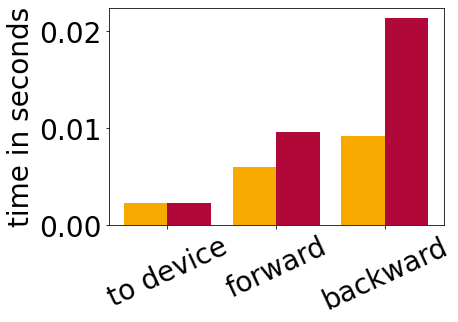

In [12]:
print('COMPARE EXECUTION TIMES FOR RESNET18')
plot_compare_to_device_forward_backward(
    non_deterministic_data_path='./results/non-deterministic-resnet18.txt',
    deterministic_data_path='./results/deterministic-resnet18.txt',
    save_to='./plots/resnet18.pdf')

COMPARE EXECUTION TIMES FOR RESNET50
non-deterministic medians: [0.00225984, 0.014529551000000002, 0.055032394500000005]
deterministic medians: [0.0022599010000000004, 0.023106714, 0.0650679905]


<Figure size 720x360 with 0 Axes>

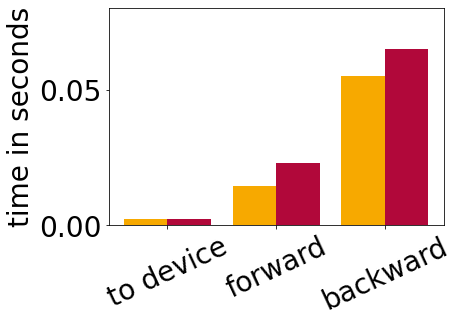

In [13]:
print('COMPARE EXECUTION TIMES FOR RESNET50')
plot_compare_to_device_forward_backward(
    non_deterministic_data_path='./results/non-deterministic-resnet50.txt',
    deterministic_data_path='./results/deterministic-resnet50.txt',
    y_min_max=[0,0.08],
    save_to='./plots/resnet50.pdf')

COMPARE EXECUTION TIMES FOR RESNET152
non-deterministic medians: [0.0022705405000000003, 0.039442005, 0.27970124]
deterministic medians: [0.0022754900000000002, 0.0664964705, 0.334694121]


<Figure size 720x360 with 0 Axes>

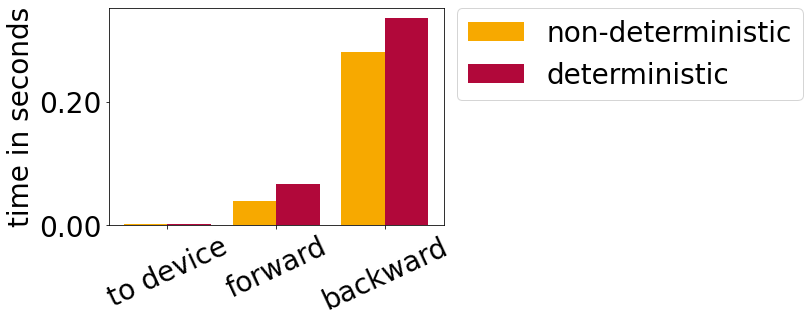

In [15]:
print('COMPARE EXECUTION TIMES FOR RESNET152')
plot_compare_to_device_forward_backward(
    non_deterministic_data_path='./results/non-deterministic-resnet152.txt',
    deterministic_data_path='./results/deterministic-resnet152.txt',
    include_legend=True,
    save_to='./plots/resnet152.pdf')

COMPARE EXECUTION TIMES FOR RESNET50
non-deterministic medians: [0.00225984, 0.014529551000000002, 0.055032394500000005]
deterministic medians: [0.0022599010000000004, 0.023106714, 0.0650679905]


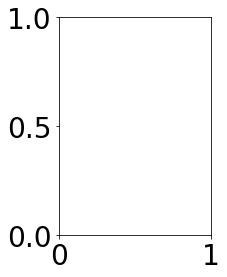

<Figure size 720x360 with 0 Axes>

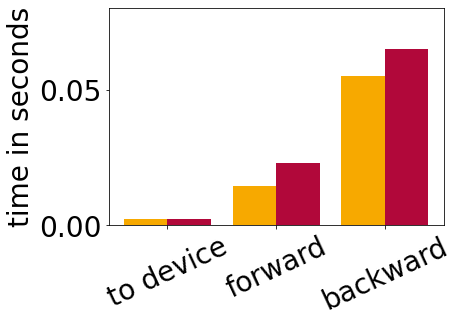

COMPARE EXECUTION TIMES FOR RESNET152
non-deterministic medians: [0.0022705405000000003, 0.039442005, 0.27970124]
deterministic medians: [0.0022754900000000002, 0.0664964705, 0.334694121]


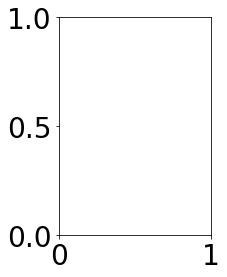

<Figure size 720x360 with 0 Axes>

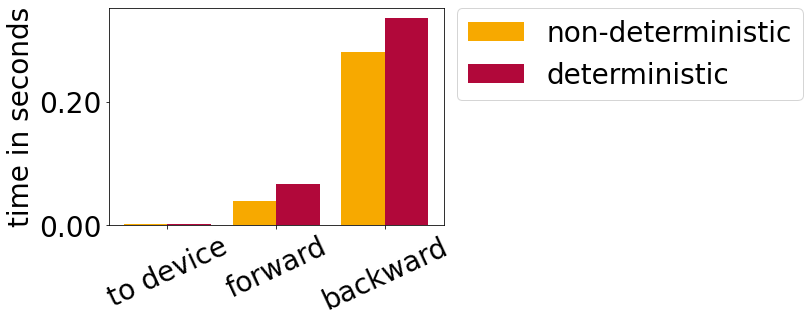

In [21]:



plt.subplot(1, 2, 1)
print('COMPARE EXECUTION TIMES FOR RESNET50')
plot_compare_to_device_forward_backward(
    non_deterministic_data_path='./results/non-deterministic-resnet50.txt',
    deterministic_data_path='./results/deterministic-resnet50.txt',
    y_min_max=[0,0.08],
    save_to='./plots/resnet50.pdf')

plt.subplot(1, 2, 2)
print('COMPARE EXECUTION TIMES FOR RESNET152')
plot_compare_to_device_forward_backward(
    non_deterministic_data_path='./results/non-deterministic-resnet152.txt',
    deterministic_data_path='./results/deterministic-resnet152.txt',
    include_legend=True,
    save_to='./plots/resnet152.pdf')
plt.show()

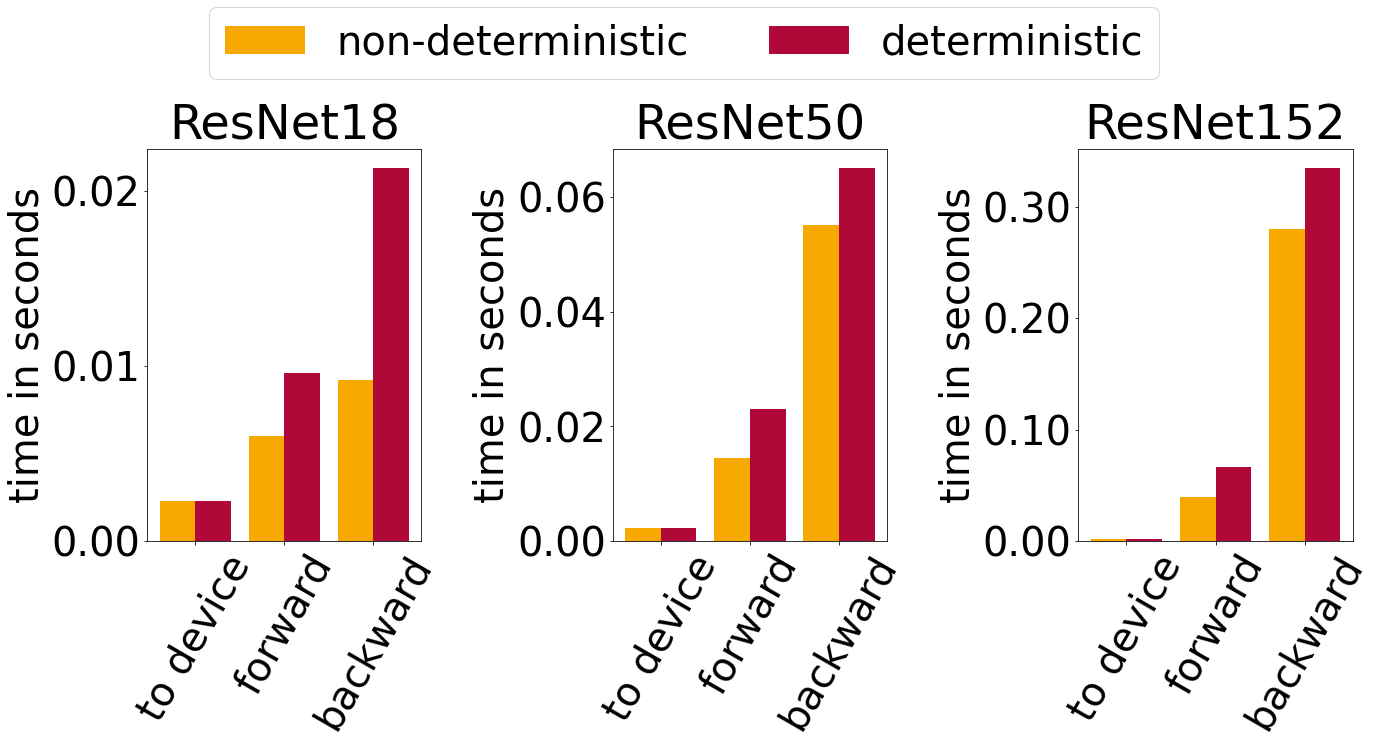

In [85]:
deterministic_data_paths = [
    './results/deterministic-resnet18.txt',
    './results/deterministic-resnet50.txt',
    './results/deterministic-resnet152.txt']
non_deterministic_data_paths = [
    './results/non-deterministic-resnet18.txt',
    './results/non-deterministic-resnet50.txt',
    './results/non-deterministic-resnet152.txt']

titles = ['ResNet18', 'ResNet50', 'ResNet152']

matplotlib.rcParams.update({'font.size': 40})
x_labels = ['to device', 'forward', 'backward']


ind = np.arange(len(x_labels))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

for i in range(3):

    non_deterministic_data_path= non_deterministic_data_paths[i]
    non_deterministic = list(map(ns2s, median_values(extract_data(non_deterministic_data_path))))[2:]

    deterministic_data_path=deterministic_data_paths[i]
    deterministic = list(map(ns2s, median_values(extract_data(deterministic_data_path))))[2:]

    ax = axes[i]
    ax.title.set_text(titles[i])
    rects1 = ax.bar(ind + width / 2, non_deterministic, width, color=HPI_LIGHT_ORANGE)
    rects2 = ax.bar(ind + 1.5 * width, deterministic, width, color=HPI_RED)
    ax.set_ylabel('time in seconds')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(x_labels)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=60)

rects1 = ax.bar(ind + width / 2, non_deterministic, width, color=HPI_LIGHT_ORANGE)
rects2 = ax.bar(ind + 1.5 * width, deterministic, width, color=HPI_RED)
fig.legend((rects1[0], rects2[0]), ('non-deterministic', 'deterministic'), loc="upper center", bbox_to_anchor=(0.5, 1.10), ncol=2)
fig.tight_layout()
fig.savefig('./plots/resnets.pdf', bbox_inches='tight')
plt.show()
